# Exercise 2 #

__*Sebastian Matiz*__

# *Logistic Regression* #

__a)__

In [785]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Creating dataset where each value is N(0,1)
X = np.random.normal(0, 1, size=(1000, 4))

print ("Dataset shape:", X.shape)

Dataset shape: (1000, 4)


__b)__

In [786]:
theta = np.array([1,-1,2,-5])

Y_no_noise = np.array([])

# theta = *dim = 1 x 4*
# x_i = *dim = 1 x 4*
# theta DOT x_i ... scalar

# labeling our expected classification (no noise)
for x in X:
    y_i = np.dot(theta,x) + .5
    Y_no_noise = np.append(Y_no_noise, 1) if y_i >= 0 else np.append(Y_no_noise, -1)


__c)__ 

In [787]:
# Gradient Descent for Logistic Regression
def GD(intercept, lR, epochs, Y):
    mCoeff = np.array([0.,0.,0.,0.])    # m_1, ... , m_4
    dmCoeff  = np.array([0.,0.,0.,0.])  # ∇J(θ)_1, ... , ∇J(θ)_4
    b = intercept             # starting intercept
    loss = []
    Y_pred = np.array([]) 
    for e in range(epochs): 
        Y_pred = np.array([])
        for x in X:
            y_pred_i = np.dot(mCoeff,x) + b
            z = 1/(1 + np.exp(-y_pred_i))  # sigmoid function is used to generate predicted data
            
            # map the output of your logistic regression to +1 and −1 values
            Y_pred = np.append(Y_pred, 1) if z >= .5 else np.append(Y_pred, -1) 
        Ydiff = np.subtract(Y_pred, Y)
        
        for i in range(len(X[0])):
            dmCoeff[i] = np.dot(Ydiff,X[:,i])
        db = sum(Ydiff)  
        for i in range(len(mCoeff)):
            mCoeff[i] = mCoeff[i] - lR*dmCoeff[i]
        b = b - lR*db    
    return mCoeff, b
                       

In [788]:
start_time = time.time()
mCoeff_no_noise, b_no_noise = GD(0, .1/1000, 1000, Y_no_noise)
print("--- %s seconds ---" % (time.time() - start_time))
print ('Coefficients:\nm_0:', float(mCoeff_no_noise[0]),
       '\nm_1: ', float(mCoeff_no_noise[1]), 
       '\nm_2: ', float(mCoeff_no_noise[2]), 
       '\nm_3: ', float(mCoeff_no_noise[3]), 
       '\nb: ', float(b_no_noise))

--- 3.2094810009002686 seconds ---
Coefficients:
m_0: 0.02139672082468083 
m_1:  -0.021207939626885136 
m_2:  0.04182089180019039 
m_3:  -0.10515781033720611 
b:  0.0108


In [789]:
def predictGivenTrainedModel(mCoeff, b, dataset):
    Y_pred = np.array([])
    for x_i in dataset:
        y_pred_i = np.dot(mCoeff,x_i) + b
        z = 1/(1 + np.exp(-y_pred_i))  #sigmoid function is used to generate predicted data
        Y_pred = np.append(Y_pred, 1) if z >= .5 else np.append(Y_pred, -1) 
    return Y_pred

## Analysis: ##

*These results we were generated when y_pred_i = 1 if sigmoid(x) >= 0.5 and y_pred_i = -1 otherwise*

The parameters for generating the data in part __b)__ are:
[1,-1,2,-5] with b = 0.5
The coefficients that resulted using gradient descent for logistic regression are: 
[0.02140, -0.02121, 0.04182,  -0.10516] with b = 0.0108

A similarity that I see between the values are that the parameters and coefficients are the same when it comes to sign. For example the parameter at index 2 of theta is negative and the resulting coefficient at index 2 is also negative.

__d)__

In [790]:
Y_noise = np.array([])

# labeling our expected classification (noise)
for x in X:
    z_i = np.random.normal(0, 2)  # N(0,2)
    y_i = np.dot(theta,x) + z_i + .5
    Y_noise = np.append(Y_noise, 1) if y_i >= 0 else np.append(Y_noise, -1)


In [791]:
start_time = time.time()
mCoeff_noise, b_noise = GD(0, .1/1000, 1000, Y_noise)
print("--- %s seconds ---" % (time.time() - start_time))
print ('Coefficients:\nm_0:', float(mCoeff_noise[0]),
       '\nm_1: ', float(mCoeff_noise[1]), 
       '\nm_2: ', float(mCoeff_noise[2]), 
       '\nm_3: ', float(mCoeff_noise[3]), 
       '\nb: ', float(b_noise))

--- 3.2025258541107178 seconds ---
Coefficients:
m_0: -0.007018247622417418 
m_1:  -0.006179251936729427 
m_2:  0.017138762040466757 
m_3:  -0.03862818984104375 
b:  0.0016000000000000018


__e)__

In [792]:
# calcError(Yactual, Ypred) calculates the percentage of wrong classifications that the model produces
def calcError(Yactual, Ypred):
    errorSum = 0
    for i, j in zip(Yactual, Ypred):
        errorSum += 1 if i != j else 0
    return errorSum/1000

In [793]:
Y_pred_no_noise = predictGivenTrainedModel(mCoeff_no_noise, b_no_noise, X)
Y_pred_noise = predictGivenTrainedModel(mCoeff_noise, b_noise, X)

noise_error = calcError(Y_noise, Y_pred_noise)
no_noise_error = calcError(Y_no_noise, Y_pred_no_noise)

print ("Noise Error: ", noise_error)
print ("No Noise Error: ", no_noise_error)

Noise Error:  0.147
No Noise Error:  0.0


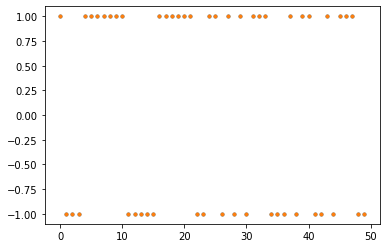

In [794]:
# Visual 
plt.plot(Y_no_noise[0:50],'.')
plt.plot(Y_pred_no_noise[0:50],'.')

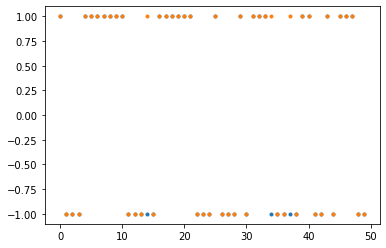

In [795]:
plt.plot(Y_noise[0:50],'.')
plt.plot(Y_pred_noise[0:50],'.')

## Analysis: ##

The coefficients learned with the noise dataset produced an error probability of 0.147. The error probability that was produced with the dataset with no noise was 0.0. This shows how noise within a dataset can lead models to predict with higher probability for error. This can be seen in the plots shown. In the first image I have plotted the first 50 sample of the predicted Y and the actual Y. The no noise trained model predicted with no error. The second image consists of the first 50 samples of the predicted Y and the actual Y. You can clearly see the discrepencies between Y predicted and Y actual (the blue data points). 

# *Logistic regression using Python* #

In [796]:
from sklearn.linear_model import LogisticRegression

__a)__

In [797]:
model_no_noise = LogisticRegression().fit(X, Y_no_noise)
model_noise = LogisticRegression().fit(X, Y_noise)

__b)__

In [798]:
res_no_noise = model_no_noise.predict(X)
res_noise = model_noise.predict(X)

no_noise_score = model_no_noise.score(X,Y_no_noise)
noise_score = model_noise.score(X, Y_noise)

print ("No Noise Score: ", no_noise_score)
print ("Noise Score: ", noise_score)

No Noise Score:  0.996
Noise Score:  0.891


## Analysis: ##

The score for no noise was .996 while the score for noise .891. This implies that the model that was trained on noisy data was less accurate in correctly classifying the data. 

# *Non-centered Data and Principal Component Analysis (PCA)* #

__a)__

In [817]:
A = np.random.normal(0, 1, size=(3, 2))
c = np.random.normal(0, 3, size=(3, 1))

__b)__

In [818]:
X = np.array([[],[],[]])
for i in range(250):
    b_i = np.random.normal(0, 1, size=(2, 1))
    x_i = np.matmul(A,b_i) + c
    X = np.append(X, x_i, axis=1)
print ("Shape of X:", X.shape)

Shape of X: (3, 250)


__c)__

In [819]:
rank = np.linalg.matrix_rank(X)
print ("rank:", rank)

rank: 3


__d)__

__*i*__

In [820]:
X_cov = np.cov(X)
print ("Covariance Matrix of X:", X_cov)

Covariance Matrix of X: [[ 0.29133037 -0.23797127  0.25635021]
 [-0.23797127  0.2822903  -0.31685966]
 [ 0.25635021 -0.31685966  0.35693933]]


In [821]:
# eigendecomposition of covariance matrix
values, vectors = np.linalg.eig(X_cov)

In [822]:
print ("Eigenvalues:", values)

Eigenvalues: [ 8.55464263e-01  7.50957308e-02 -5.12319559e-17]


Here we see that the first 2 eigenvectors are the top two principle component directions.

In [823]:
print ("Principle Component Directions:", vectors)

Principle Component Directions: [[ 0.52690885 -0.8466144   0.07490742]
 [-0.56818839 -0.28533231  0.77184676]
 [ 0.63208308  0.44925441  0.63138059]]


In [824]:
U = vectors
minEigenValIndex = np.argmin(values)
# We are going to remove the smalled Eigenvector to just capture the top 2 Principle Component Directions
U[:,minEigenValIndex] = 0
print ("U: ", U)

U:  [[ 0.52690885 -0.8466144   0.        ]
 [-0.56818839 -0.28533231  0.        ]
 [ 0.63208308  0.44925441  0.        ]]


In [825]:
projection = np.matmul(U.transpose(), X)

print ("Projection shape:", projection.shape)

Projection shape: (3, 250)


In [826]:
def reconError(Dataset, Projection):
    summation = 0
    for i, j in zip(Dataset, Projection):
        diff = i - j
        summation += np.linalg.norm(diff)**2
    return summation


print ("Reconstructions Error (non-centered data):", reconError(X.transpose(), projection.transpose()))

Reconstructions Error (non-centered data): 10573.249245158506


Here we see that the reconstruction error is large because the data has not been centered.

Below I have plotted the original data from all view points.

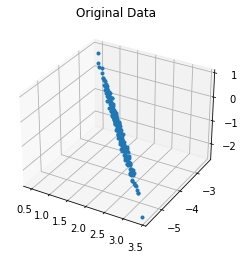

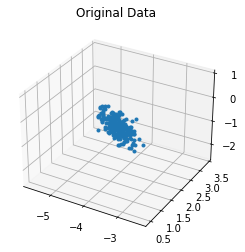

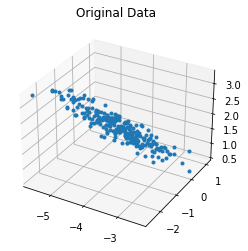

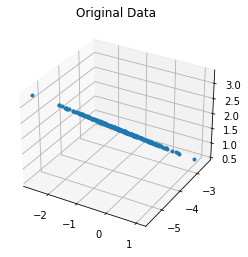

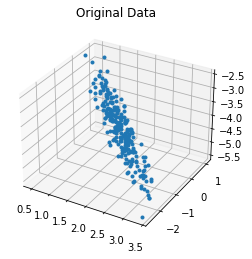

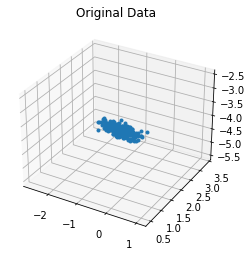

In [827]:
x_plot = plt.axes(projection ='3d')
 
z = X[0,:]
x = X[1,:]
y = X[2,:]
 
# plotting
x_plot.plot3D(x, y, z, '.')
x_plot.set_title('Original Data')
plt.show()

x_plot = plt.axes(projection ='3d')
 
z = X[0,:]
x = X[2,:]
y = X[1,:]
 
# plotting
x_plot.plot3D(x, y, z, '.')
x_plot.set_title('Original Data')
plt.show()

x_plot = plt.axes(projection ='3d')
 
z = X[1,:]
x = X[2,:]
y = X[0,:]
 
# plotting
x_plot.plot3D(x, y, z, '.')
x_plot.set_title('Original Data')
plt.show()

x_plot = plt.axes(projection ='3d')
 
z = X[1,:]
x = X[0,:]
y = X[2,:]
 
# plotting
x_plot.plot3D(x, y, z, '.')
x_plot.set_title('Original Data')
plt.show()

x_plot = plt.axes(projection ='3d')
 
z = X[2,:]
x = X[1,:]
y = X[0,:]
 
# plotting
x_plot.plot3D(x, y, z, '.')
x_plot.set_title('Original Data')
plt.show()

x_plot = plt.axes(projection ='3d')
 
z = X[2,:]
x = X[0,:]
y = X[1,:]
 
# plotting
x_plot.plot3D(x, y, z, '.')
x_plot.set_title('Original Data')
plt.show()

__*ii*__

In [828]:
C = X
C -= np.mean(C, axis=1).reshape(3,1)

In [829]:
C_cov = np.cov(C)

In [830]:
c_values, c_vectors = np.linalg.eig(C_cov)
print ("Eigenvalues:", c_values)

Eigenvalues: [8.55464263e-01 7.50957308e-02 2.30411808e-17]


In [831]:
U_c = c_vectors
minEigenValIndex = np.argmin(c_values)
U_c[:,minEigenValIndex] = 0
print ("Top 2 Principle Components:", U_c)

Top 2 Principle Components: [[ 0.52690885 -0.8466144   0.        ]
 [-0.56818839 -0.28533231  0.        ]
 [ 0.63208308  0.44925441  0.        ]]


In [832]:
c_projection = np.matmul(U_c.transpose(), C)

print ("Projection shape:", c_projection.shape)

Projection shape: (3, 250)


In [833]:
print ("Reconstruction Error (centered):", reconError(C.transpose(), c_projection.transpose()))

Reconstruction Error (centered): 249.61530020618937


As expected, once we centered the data we see that the reconstruction error was small, in this case 249.62. This variation in reconstruction error can be drastically reduced by centering the data. Thus showing the importance of centering data.

Below I have plotted the centered data from all view points.

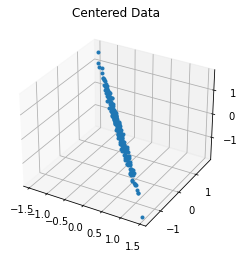

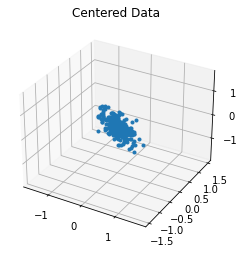

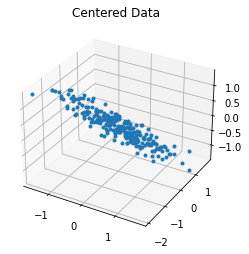

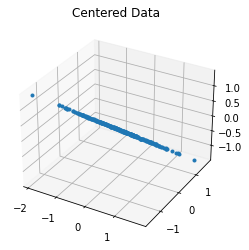

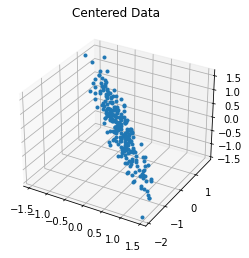

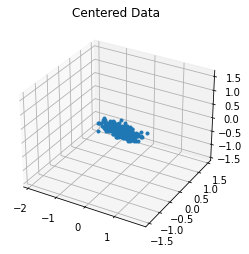

In [834]:
c_plot = plt.axes(projection ='3d')
 
z = C[0,:]
x = C[1,:]
y = C[2,:]
 
# plotting
c_plot.plot3D(x, y, z, '.')
c_plot.set_title('Centered Data')
plt.show()

c_plot = plt.axes(projection ='3d')
 
z = C[0,:]
x = C[2,:]
y = C[1,:]
 
# plotting
c_plot.plot3D(x, y, z, '.')
c_plot.set_title('Centered Data')
plt.show()

c_plot = plt.axes(projection ='3d')
 
z = C[1,:]
x = C[2,:]
y = C[0,:]
 
# plotting
c_plot.plot3D(x, y, z, '.')
c_plot.set_title('Centered Data')
plt.show()

c_plot = plt.axes(projection ='3d')
 
z = C[1,:]
x = C[0,:]
y = C[2,:]
 
# plotting
c_plot.plot3D(x, y, z, '.')
c_plot.set_title('Centered Data')
plt.show()

c_plot = plt.axes(projection ='3d')
 
z = C[2,:]
x = C[1,:]
y = C[0,:]
 
# plotting
c_plot.plot3D(x, y, z, '.')
c_plot.set_title('Centered Data')
plt.show()

c_plot = plt.axes(projection ='3d')
 
z = C[2,:]
x = C[0,:]
y = C[1,:]
 
# plotting
c_plot.plot3D(x, y, z, '.')
c_plot.set_title('Centered Data')
plt.show()